# Problem 1: Linear Regression from Scratch


In [9]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(100)

Let's generate some data points first, by the equation $y = x - 3$.

In [ ]:
x = np.random.randint(100, size=100)/30 - 2
X = x.reshape(-1, 1)

print(X.shape)
y = x + -3 + 0.3*np.random.randn(100)

(100, 1)


Let's then visualize the data points we just created.

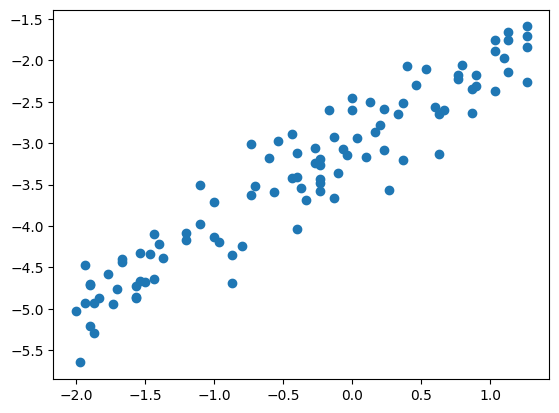

In [ ]:
plt.scatter(X, y)

## 1.1 Gradient of vanilla linear regression model

We learnt that the cost function of a linear regression model can be expressed as **Equation 1**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$

The gredient of it can be written as **Equation 2**:

$$\frac{\partial J(\theta)}{\partial \theta}=$$




## 1.2 Gradient of vanilla regularized regression model

After adding the L2 regularization term, the linear regression model can be expressed as **Equation 3**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j}^{n} (\theta_{j})^{2}$$

The gradient of it can be written as **Equation 4**:

$$\frac{\partial J(\theta)}{\partial \theta}=$$

## 1.3 Implementing the cost function of a regularized regression model

## 1.4 Implement the gradient of the cost function of a regularized regression model

Implementing the gradient of the cost function of a regularized regression model according to the above equations.

In [ ]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """

    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features

    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )


    # stores the updates on the cost function (loss function)
    cost_history_list = []

    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process

        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)

        # calculate the difference between the actual and predicted value
        error = y_estimated - y


##############################################################################################################
####################################### Begin of Question 1.3 ################################################
##############################################################################################################


        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = (1/(2*m))*np.sum(error**2)



        # regularization term
        reg_term =(lambda_value/(2*m))*np.sum(W**2)


        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term

##############################################################################################################
####################################### End of Question 1.3 ##################################################
##############################################################################################################


##############################################################################################################
####################################### Begin of Question 1.4 ################################################
##############################################################################################################



        # calculate the gradient of the cost function with regularization term (Equation )
        gradient =(1/m)*(X.T.dot(error)+(lambda_value*W))



        # Now we have to update our weights
        W = W - alpha * gradient

##############################################################################################################
####################################### End of Question 1.4 ##################################################
##############################################################################################################


        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)

    # Let's print out the cost
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")

    return W, cost_history_list

Cost with regularization: 0.05165888565058274
Mean square error: 0.05165888565058274


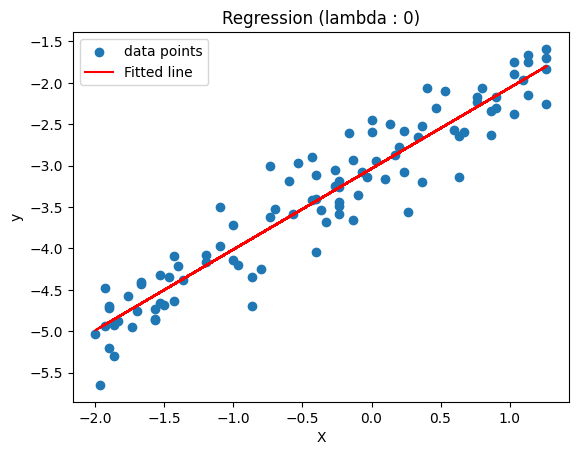

Cost with regularization: 0.5181225049184746
Mean square error: 0.08982014821513126


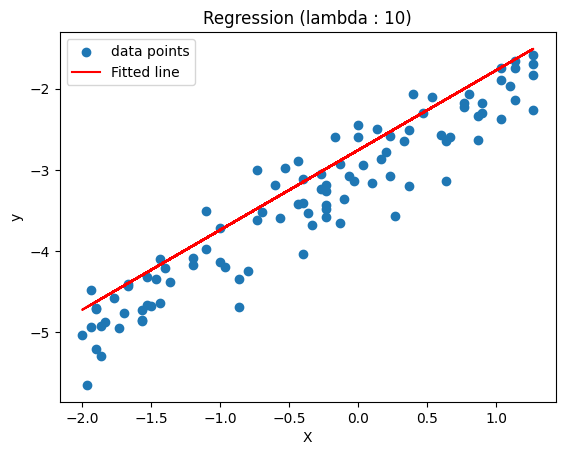

Cost with regularization: 2.793172488740026
Mean square error: 1.2785107029715972


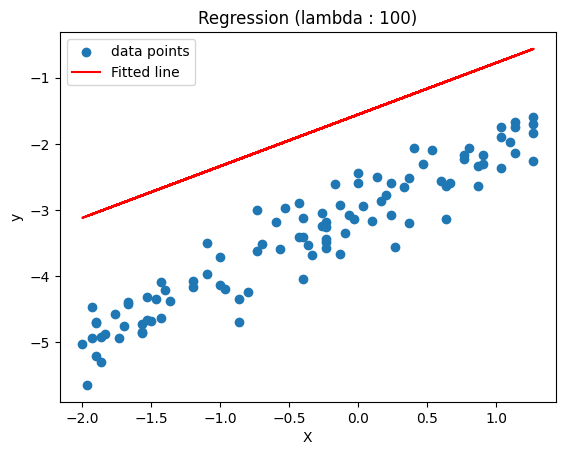

Cost with regularization: 5.591464362606628
Mean square error: 4.946888025066496


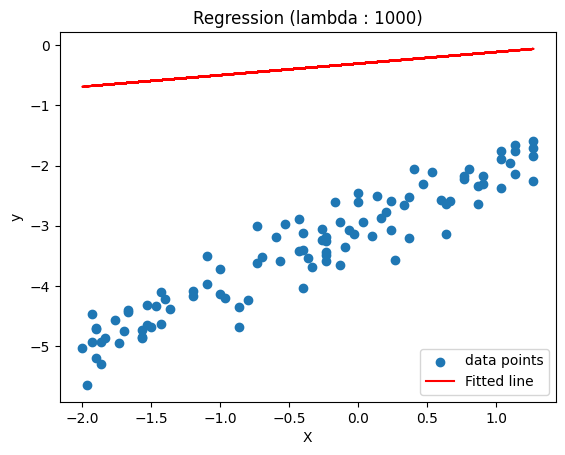

Cost with regularization: 6.2426956269339735
Mean square error: 6.1614425833558135


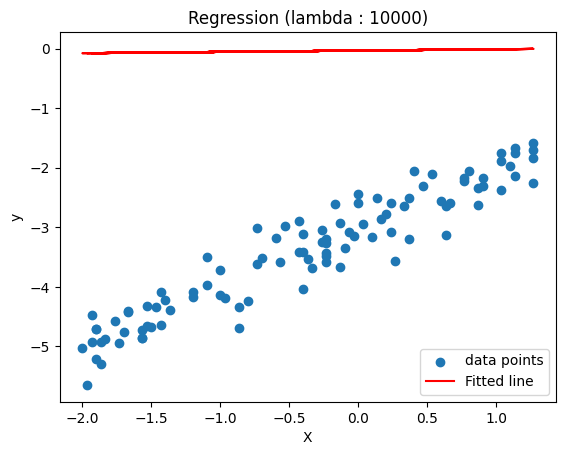

In [ ]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01,
                                 lambda_value=lambda_, epochs=1000)

    fitted_line = np.dot(X, weight[1]) + weight[0]
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()


1) The best choice of lambda is 0

2) As λ increases, the optimization process tends to give more emphasis to minimizing the regularization term rather than fitting the data perfectly.When λ is very large, the regularization term dominates the objective function, and the optimization process aims to minimize the coefficients as much as possible to reduce the penalty. This can lead to coefficients that are very close to zero, effectively making the model simpler and less prone to overfitting. As a result, the regressed line becomes flatter, indicating a more regularized and less flexible model.

#Getting familiar with PyTorch

Loading the “ data/curve80.txt ” data set, and split it into 75% / 25% training/test. We will use degree=5
for all the polynomial features.


In [3]:
from google.colab import files
files.upload() # Upload  mltools.zip
!unzip -q mltools.zip
%cd mltools

Saving mltools.zip to mltools.zip
/content/mltools


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import mltools as ml
import torch


In [10]:
data = np.genfromtxt("data/curve80.txt")
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
degree = 5
XtrP = ml.transforms.fpoly(Xtr, degree=degree, bias=False)
XtrP,params = ml.transforms.rescale(XtrP)


Transforming numpy arrays to tensor. Making sure the XtrP_tensor has the shape of (60, 5) while Ytr_tensor
has the shape of (60, 1).

In [11]:

XtrP_tensor = torch.tensor(XtrP)
Ytr_tensor =torch.tensor(Ytr)

XtrP_tensor = XtrP_tensor.float()
Ytr_tensor = Ytr_tensor.float()
Ytr_tensor=Ytr_tensor.view(60, 1)

In [ ]:
print(XtrP_tensor.shape)
print(Ytr_tensor.shape)

torch.Size([60, 5])
torch.Size([60, 1])


Initializing our linear regressor

In [ ]:
 linear_regressor = torch.nn.Linear(in_features=5, out_features=1)

Setting up the criterion and optimizer.

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_regressor.parameters(), lr=0.1)
epochs = 100000

Training the regressor using gradient descent

In [ ]:
loss_record = []
for _ in range(epochs):
    optimizer.zero_grad() # set gradient to zero
    pred_y = linear_regressor(XtrP_tensor)
    loss = criterion(pred_y, Ytr_tensor) # calculate loss function
    loss.backward() # backpropagate gradient
    loss_record.append(loss.item())
    optimizer.step() # update the parameters in the linear regressor


Plotting the loss v.s. epochs.

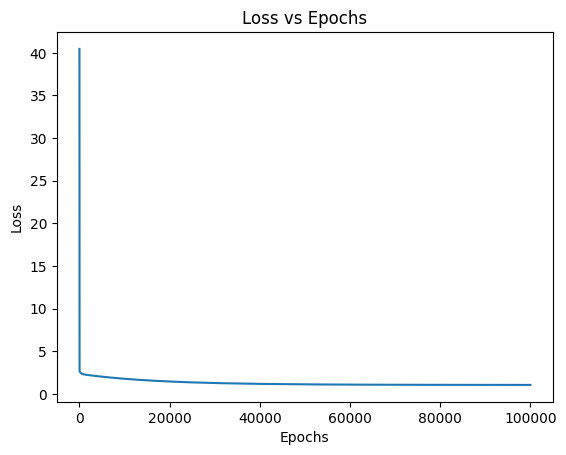

In [ ]:
plt.plot(range(epochs), (loss_record))
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


Visualizing the trained linear regressor

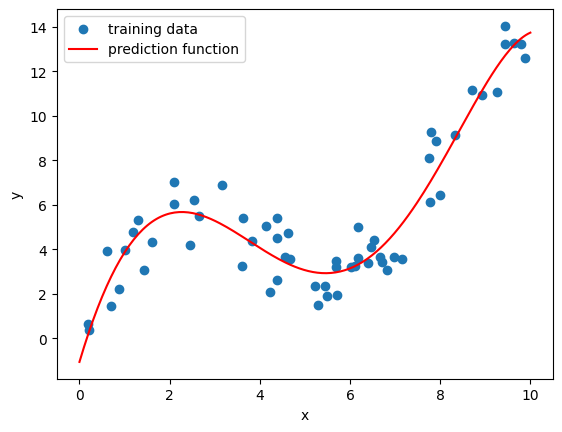

In [ ]:
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
xsP, _ = ml.transforms.rescale(ml.transforms.fpoly(xs,degree=degree,bias=False), params)
xsP_tensor = torch.from_numpy(xsP).float()
ys = linear_regressor(xsP_tensor)

plt.scatter(Xtr,Ytr,label="training data")
plt.plot(xs,ys.detach().numpy(),label="prediction function",color ="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()